# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import (
    cross_val_score,
    KFold,
    cross_val_predict,
    GridSearchCV,
    cross_validate,
)
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    f1_score,
    recall_score,
    classification_report,
)
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
def train_test_validation_split(
    x: pd.DataFrame,
    y: pd.Series,
    train_size: float = 0.7,
    test_size: float = 0.15,
    validation_size: float = 0.15,
) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.Series, pd.Series, pd.Series]:
    """Split data into fixed train, test and validation subsets."""
    x_train, x_test, y_train, y_test = train_test_split(
        x,
        y,
        train_size=train_size,
        test_size=test_size + validation_size,
        random_state=42,
    )
    x_test, x_validation, y_test, y_validation = train_test_split(
        x_test,
        y_test,
        train_size=test_size / (test_size + validation_size),
        test_size=validation_size / (test_size + validation_size),
        random_state=42,
    )
    return x_train, x_test, x_validation, y_train, y_test, y_validation

In [46]:
df: pd.DataFrame = pd.read_csv("../Vectores_Caracteristicos_Mariposas.csv")
x: pd.DataFrame = df.drop("Etiqueta", axis=1)
y: pd.Series = df["Etiqueta"].astype(int)

(
    x_train,
    x_test,
    y_train,
    y_test,
) = train_test_split(x, y, random_state=42)

# Hiperparámetros

In [47]:
dtc = DecisionTreeClassifier(criterion="entropy", random_state=42)

cv = GridSearchCV(
    dtc,
    param_grid={
        "criterion": ["gini", "entropy"],
    },
    scoring=["precision_macro", "recall_macro", "f1_macro"],
    refit="f1_macro",
    cv=5,
)

cv.fit(x_train, y_train)
print(cv.best_params_)
df = pd.DataFrame(cv.cv_results_)
df

{'criterion': 'gini'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,params,split0_test_precision_macro,split1_test_precision_macro,split2_test_precision_macro,split3_test_precision_macro,...,std_test_recall_macro,rank_test_recall_macro,split0_test_f1_macro,split1_test_f1_macro,split2_test_f1_macro,split3_test_f1_macro,split4_test_f1_macro,mean_test_f1_macro,std_test_f1_macro,rank_test_f1_macro
0,0.162802,0.007581,0.003548,0.000195,gini,{'criterion': 'gini'},0.301049,0.317859,0.343628,0.228794,...,0.028261,1,0.279728,0.313682,0.300272,0.240899,0.330072,0.292930,0.030808,1
1,0.283593,0.006968,0.003368,0.000215,entropy,{'criterion': 'entropy'},0.316910,0.299122,0.266821,0.267202,...,0.030737,2,0.294338,0.299370,0.244689,0.274800,0.254760,0.273591,0.021384,2


# 5-Fold Cross Validation

In [48]:
dtc = DecisionTreeClassifier(criterion="gini", random_state=42,  max_depth=10, min_samples_leaf=8, min_samples_split=2)

scores: dict = cross_validate(
    dtc,
    x,
    y,
    cv=5,
    scoring=["precision_macro", "recall_macro", "f1_macro"],
    n_jobs=5,
)

a = pd.DataFrame(scores)
print(a)

   fit_time  score_time  test_precision_macro  test_recall_macro  \
0  0.192673    0.003404              0.344437           0.342867   
1  0.201221    0.003186              0.378490           0.298106   
2  0.192518    0.003388              0.316498           0.322346   
3  0.202123    0.003194              0.371060           0.348054   
4  0.196633    0.004079              0.290250           0.316166   

   test_f1_macro  
0       0.342329  
1       0.315093  
2       0.312768  
3       0.352138  
4       0.297756  


In [87]:
dtc = DecisionTreeClassifier(criterion="gini", random_state=42)
dtc.fit(x_train, y_train)

predictions = dtc.predict(x_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.09      0.11      0.10        19
           2       0.20      0.20      0.20        25
           3       0.35      0.29      0.32        21
           4       0.00      0.00      0.00        24
           5       0.04      0.07      0.05        14
           6       0.37      0.28      0.32        25
           7       0.38      0.36      0.37        22
           8       0.83      0.83      0.83        12
           9       0.15      0.20      0.17        20
          10       0.41      0.42      0.42        26

    accuracy                           0.26       208
   macro avg       0.28      0.28      0.28       208
weighted avg       0.27      0.26      0.26       208



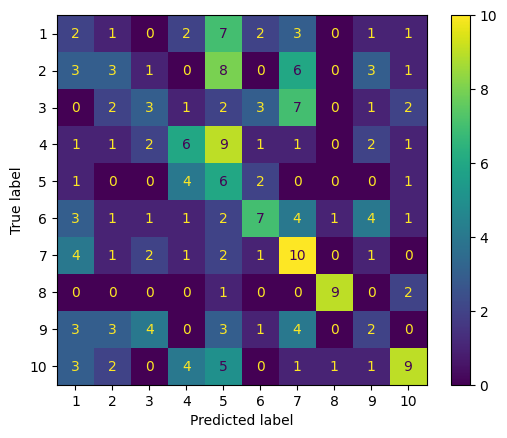

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(y_test, predictions), display_labels=dtc.classes_).plot()